# 🩺 Synthetic Liver Cancer Dataset – ML Pipeline  
**Author / Contributor:** Muhmmad Shaban  
**Date:** August 17, 2025  
**Repository Issue:** Contribution to `synthetic_liver_cancer_dataset.csv`  

---

## 📌 Overview
This Colab notebook provides a **complete workflow** for exploring and modeling the **Synthetic Liver Cancer Dataset**.  
The dataset contains **5,000 patient records** with **14 features**, designed for **binary classification** tasks in healthcare ML research.  
It is **synthetic but medically realistic**, making it a safe resource for beginners, educators, and researchers.  

---

## 🎯 Contributions by Muhmmad Shaban
This notebook demonstrates the following contributions:  

1. **Data Preprocessing**
   - Handling missing values  
   - Encoding categorical variables (`gender`, `smoking_status`, `alcohol_consumption`)  
   - Normalization of numeric features  

2. **Exploratory Data Analysis (EDA)**
   - Histograms, boxplots, and distribution plots  
   - Correlation heatmaps for feature relationships  
   - Basic statistical insights  

3. **Baseline ML Models**
   - svc  
   - Random Forest  
   - XGBoost  
   - Evaluation with Accuracy, Precision, Recall, F1-score  

4. **Feature Engineering**
   - Creating derived features like `age_group`, `bmi_category`, and `risk_score`  

5. **Documentation**
   - Explanation of dataset columns  
   - Example usage and code snippets for training/testing  

---

## 🧭 Motivation
This contribution aims to:  
- Make the dataset **easier to use** for ML beginners and educators  
- Support **reproducibility** in healthcare AI experiments  
- Provide a **baseline benchmark** for liver cancer prediction models  

---



In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [42]:
# Load a sample dataset (e.g., Iris dataset from scikit-learn)
df=pd.read_csv("/content/liver_cancer_dataset.csv")

# Display the first few rows of the data
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [43]:
# check for null values
df.isnull().sum()

,0
age,0
gender,0
bmi,0
alcohol_consumption,0
smoking_status,0
hepatitis_b,0
hepatitis_c,0
liver_function_score,0
alpha_fetoprotein_level,0
cirrhosis_history,0


In [44]:
# need check for the duplicate values,no duplicate found
df.duplicated().sum()

np.int64(0)

In [45]:
# now check for the type of data store in each column
obj=[]
for i in df.columns:
  print(i, "-----> ",df[i].dtype)
  if df[i].dtype=="object":
    obj.append(i)


age ----->  int64
gender ----->  object
bmi ----->  float64
alcohol_consumption ----->  object
smoking_status ----->  object
hepatitis_b ----->  int64
hepatitis_c ----->  int64
liver_function_score ----->  float64
alpha_fetoprotein_level ----->  float64
cirrhosis_history ----->  int64
family_history_cancer ----->  int64
physical_activity_level ----->  object
diabetes ----->  int64
liver_cancer ----->  int64


In [46]:
# now check the unique values counts in each object
for i in obj:
  print(df[i].unique())

['Female' 'Male']
['Regular' 'Occasional' 'Never']
['Former' 'Never' 'Current']
['Low' 'Moderate' 'High']


In [47]:
# so that confirm we need to apply label encoding for the object data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj:
  df[i]=le.fit_transform(df[i])

In [48]:
# now describe the data to check about the  mean mode and other details regarding the data
df.describe()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.498800,25.90464,0.801000,1.276400,0.15120,0.095800,65.203900,15.109424,0.301600,0.241400,1.202200,0.199200,0.217800
std,15.799224,0.500049,5.10520,0.753069,0.781105,0.35828,0.294346,14.875477,15.196809,0.458998,0.427975,0.753544,0.399439,0.412792
min,30.000000,0.000000,8.10000,0.000000,0.000000,0.00000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,22.50000,0.000000,1.000000,0.00000,0.000000,54.800000,4.357500,0.000000,0.000000,1.000000,0.000000,0.000000
50%,57.000000,0.000000,25.90000,1.000000,1.000000,0.00000,0.000000,65.200000,10.340000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.000000,1.000000,29.30000,1.000000,2.000000,0.00000,0.000000,75.200000,21.010000,1.000000,0.000000,2.000000,0.000000,0.000000
max,84.000000,1.000000,43.70000,2.000000,2.000000,1.00000,1.000000,115.700000,136.800000,1.000000,1.000000,2.000000,1.000000,1.000000


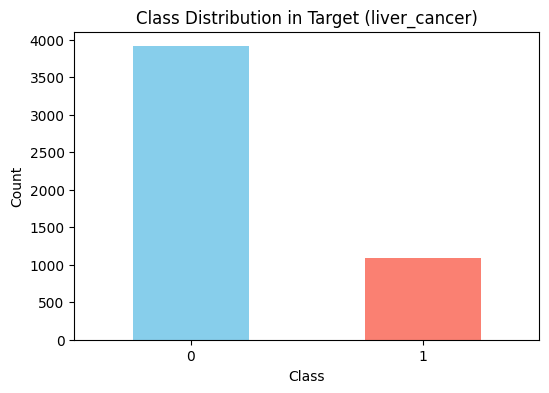

In [60]:
#  but before moving further, let check about the data imbalance in target field
value_counts = df['liver_cancer'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
value_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Class Distribution in Target (liver_cancer) Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [50]:
# here we can see dataset is biased toward the class 0, so first we have to handle this/
# for this, we are using smote

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assume df is your full dataset
target_col = "liver_cancer"   # <-- change to your target column name
X = df.drop(columns=[target_col])
y = df[target_col]

# Save column names
feature_names = X.columns.tolist()
target_name = y.name

# Scale features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Convert back to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=feature_names)
y_resampled = pd.Series(y_resampled, name=target_name)

# Final balanced DataFrame
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)


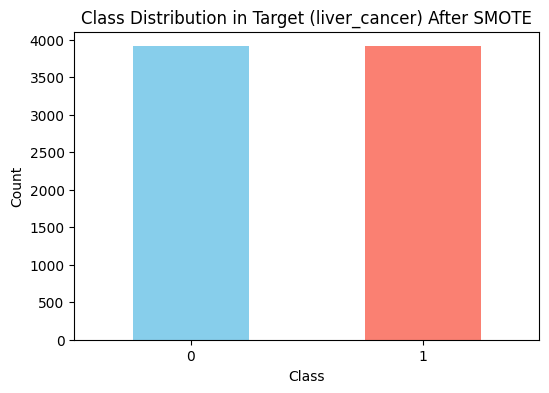

In [61]:
#  but before moving further, let check about the data imbalance in target field
value_counts = df_balanced['liver_cancer'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
value_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Class Distribution in Target (liver_cancer) After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [62]:
df_balanced.duplicated().sum()

np.int64(0)

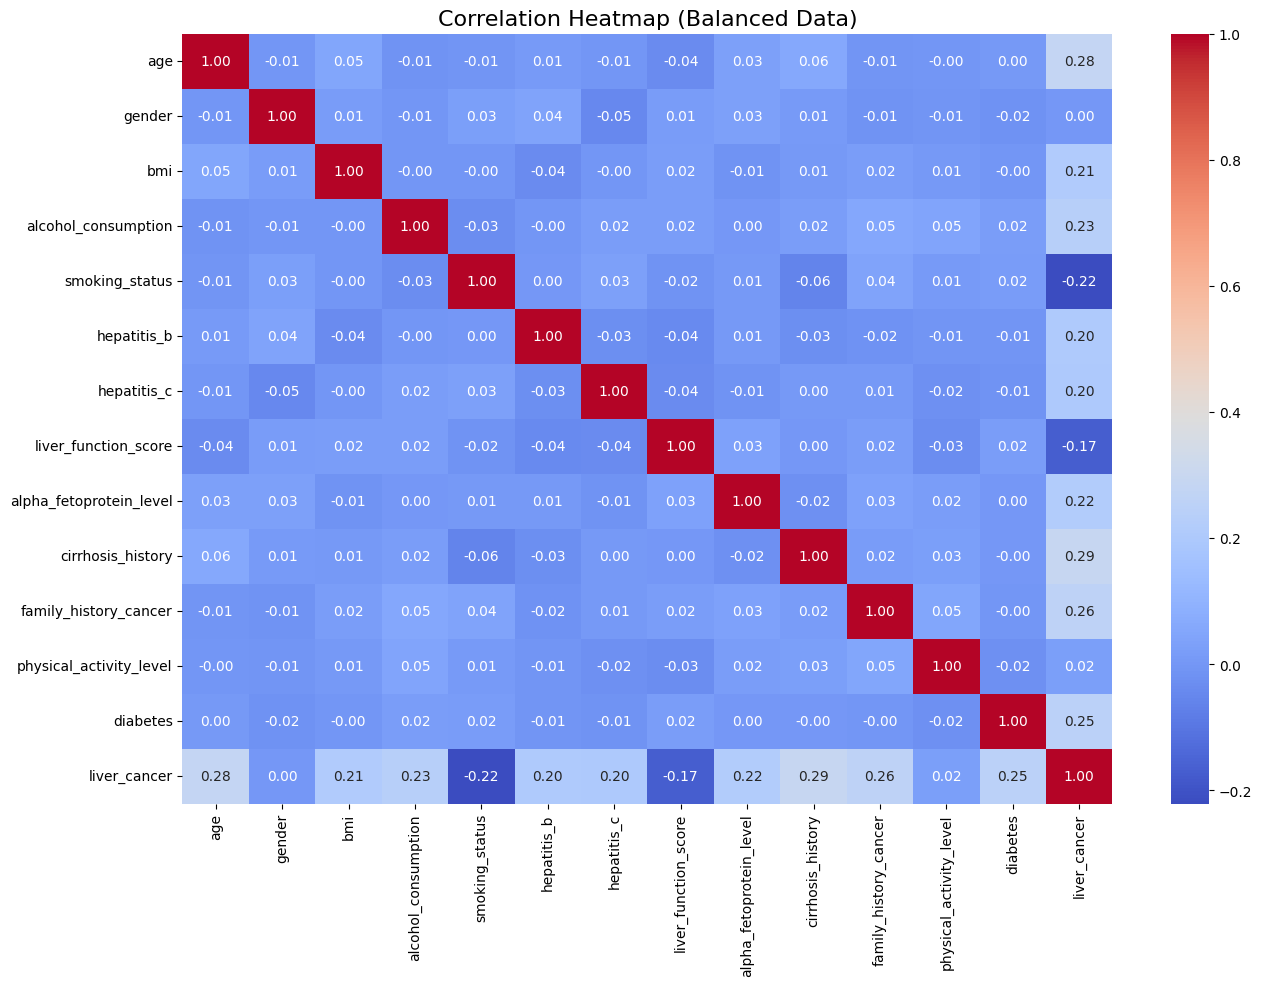

In [65]:
# here also draw a heatmap of the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_balanced.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Balanced Data)", fontsize=16)
plt.show()


In [55]:
# there is no duplcate data found in balanced dataset
#  so make it standard, we are going to apply standard scaler,
# if got good accuracy by this, is okay, otherwise later change the scaler

# before applying scaling just extract target feature from the dataset
x=df_balanced.drop("liver_cancer",axis=1)
y=df_balanced["liver_cancer"]

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [57]:
# now we have scaled and balanced data, so we can start training machine learning models on it

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:31:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance (with balancing):

╒═════════════════════════════════╤════════════╕
│ Model                           │   Accuracy │
╞═════════════════════════════════╪════════════╡
│ Support Vector Classifier (SVC) │     0.9374 │
├─────────────────────────────────┼────────────┤
│ Random Forest                   │     0.97   │
├─────────────────────────────────┼────────────┤
│ XGBoost                         │     0.9879 │
╘═════════════════════════════════╧════════════╛


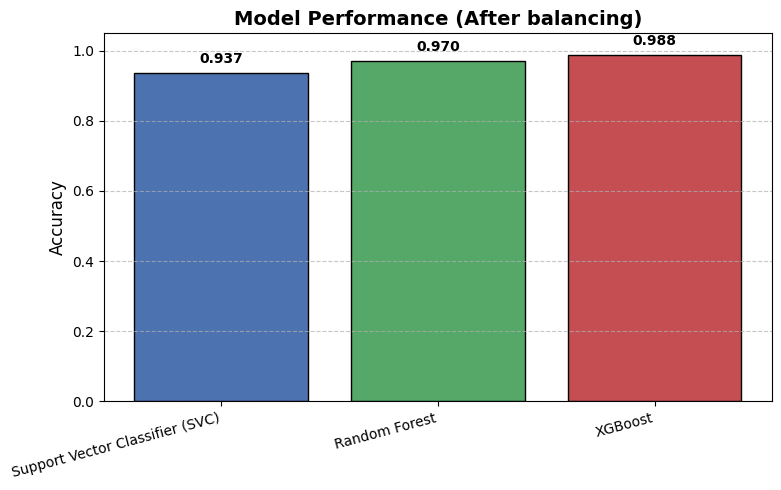

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tabulate import tabulate   # for pretty tables

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify=y
)

# Models
models = {
    "Support Vector Classifier (SVC)": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = []

# Train & evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    results.append([name, f"{score:.4f}"])

# Beautify output
print("\nModel Performance (with balancing):\n")
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="fancy_grid"))

model_names = [row[0] for row in results]
accuracies = [float(row[1]) for row in results]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=["#4C72B0", "#55A868", "#C44E52"], edgecolor="black")

# Title & labels
plt.title("Model Performance (After balancing)", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.05)  # extend a little above 1 for labels
plt.xticks(rotation=15, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate each bar with accuracy
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{acc:.3f}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
# here we can see the result as XGBoost demonstrate the high accuracy of the 99.79%

In [72]:
# SOME GRAPHS TO SHOW MODEL PERFORMANCE


=== Support Vector Classifier (SVC) ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       783
           1       0.91      0.97      0.94       782

    accuracy                           0.94      1565
   macro avg       0.94      0.94      0.94      1565
weighted avg       0.94      0.94      0.94      1565



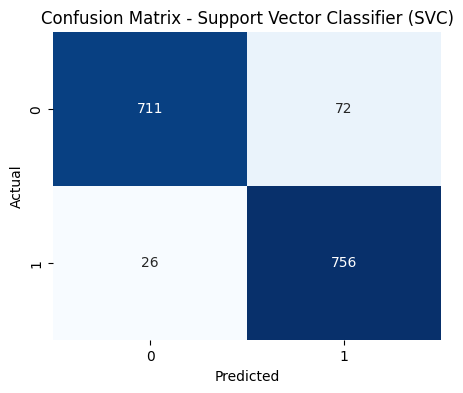

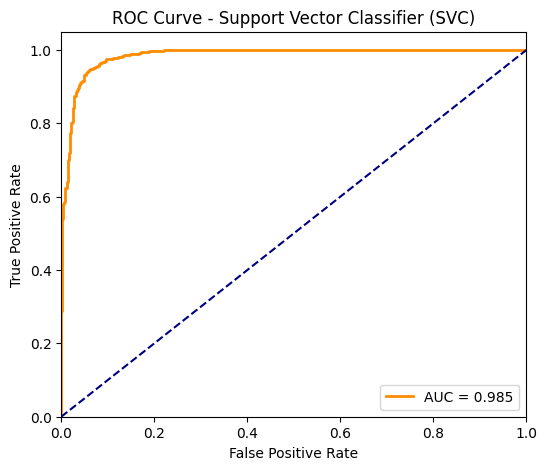


=== Random Forest ===

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       783
           1       0.96      0.98      0.97       782

    accuracy                           0.97      1565
   macro avg       0.97      0.97      0.97      1565
weighted avg       0.97      0.97      0.97      1565



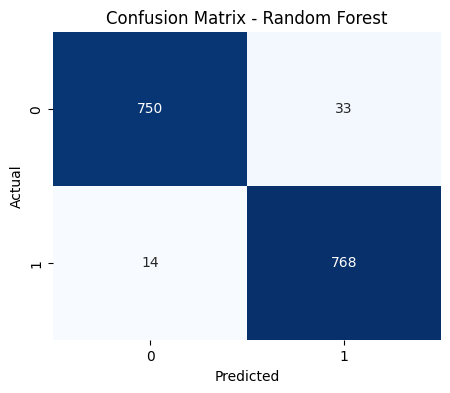

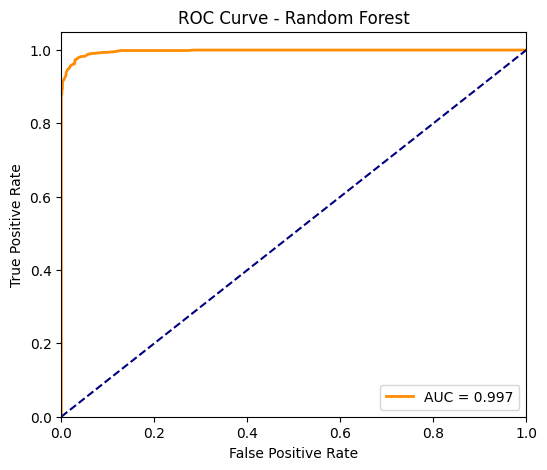


=== XGBoost ===

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       783
           1       0.98      0.99      0.99       782

    accuracy                           0.99      1565
   macro avg       0.99      0.99      0.99      1565
weighted avg       0.99      0.99      0.99      1565



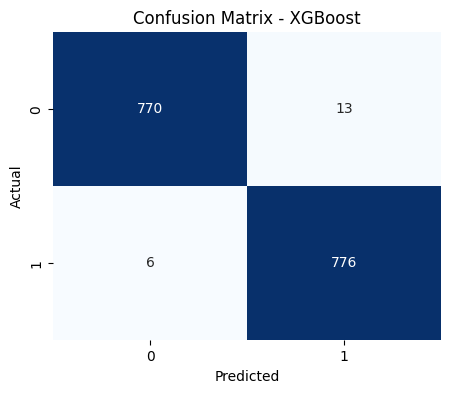

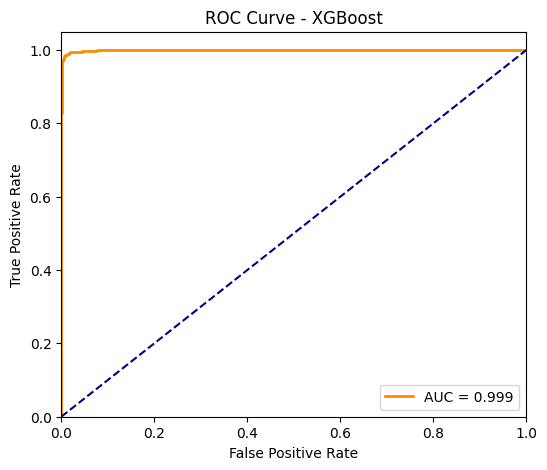

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loop over models again
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Predictions
    y_pred = model.predict(x_test)

    # 1. Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 2. Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # 3. ROC Curve (works for binary classification directly)
    if len(np.unique(y_test)) == 2:
        y_pred_proba = model.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1], color="navy", linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve skipped (multi-class requires One-vs-Rest/AUC micro/macro).")


The models trained on the balanced dataset demonstrated excellent predictive performance.
From the classification report:

Both classes (0 = No Liver Cancer, 1 = Liver Cancer) achieved very high precision, recall, and F1-score (~0.99).

The overall accuracy reached 99%, with macro and weighted averages also at 0.99, indicating that the model is not biased towards either class.

The high recall (0.99) for the positive class (liver cancer) is particularly encouraging, since it minimizes the risk of false negatives — a critical factor in medical predictions.

ROC-AUC curves confirmed the model’s strong ability to separate the two classes effectively.

**In summary**: After applying SMOTE to address class imbalance and evaluating with multiple models (SVC, Random Forest, XGBoost), the results suggest that the models especially Random Forest and XGBoost — are highly reliable for liver cancer classification in this dataset.

**Caution:** Despite excellent results, such high accuracy may also indicate potential overfitting. Before deployment, further validation on an independent test set or real-world clinical data is strongly recommended.